## Part 2: Data Cleaning and EDA

I am dropping unnecessary columns, do feature engineering as necessary and try to visualize some features for more feature engineering or further data manipulation. 

In [1]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV

**import comment data**

In [2]:
crypto_df = pd.read_csv('crypto_subs_pushshift.csv')
print('\nCrypto subreddit size: ', crypto_df.shape)
print()
crypto_df.head()


Crypto subreddit size:  (2000, 14)



,Unnamed: 0,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,post_type
0,0,mattpark2001,t2_7p2wr2xl,1639370257,rf79s5,1,/r/CryptoCurrency/comments/rf79s5/deso_is_the_...,1,[removed],CryptoCurrency,DESO is the Future of Social Media,https://www.reddit.com/r/CryptoCurrency/commen...,True,submission
1,1,ubudjsksisj,t2_9hf5b3hn,1639370257,rf79s7,1,/r/CryptoCurrency/comments/rf79s7/jsksjsjskd/,1,[removed],CryptoCurrency,jsksjsjskd,https://www.reddit.com/r/CryptoCurrency/commen...,True,submission
2,2,CNCharger,t2_myjfg,1639370301,rf7a9u,1,/r/CryptoCurrency/comments/rf7a9u/laptop_mining/,1,[removed],CryptoCurrency,Laptop Mining,https://www.reddit.com/r/CryptoCurrency/commen...,True,submission
3,3,StrenuousSOB,t2_a20txyp2,1639370370,rf7az8,1,/r/CryptoCurrency/comments/rf7az8/so_just_a_si...,1,[removed],CryptoCurrency,So just a simple question to put out there! Ca...,https://www.reddit.com/r/CryptoCurrency/commen...,True,submission
4,4,ubudjsksisj,t2_9hf5b3hn,1639370391,rf7b74,0,/r/CryptoCurrency/comments/rf7b74/hhhhajaisixu...,0,hhhhajaisixusnwnnw hhhhajaisixusnwnnw hhhhaja...,CryptoCurrency,hhhhajaisixusnwnnw,https://www.reddit.com/r/CryptoCurrency/commen...,True,submission


In [3]:
stock_df = pd.read_csv('StockMarket_subs_pushshift.csv')
print('\nStock subreddit size: ', stock_df.shape)
print()
stock_df.head()


Stock subreddit size:  (2060, 14)



,Unnamed: 0,author,author_fullname,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,is_self,post_type
0,0,Beautiful_Champion21,t2_78wdhglm,1639371043,rf7if1,0,/r/StockMarket/comments/rf7if1/lfg_need_1_more...,1,NaN,StockMarket,Lfg need 1 more referral help a homie out :),https://act.webull.com/ro/1BnoxhdA4ANw/qud/inv...,False,submission
1,1,DailyMarketStatus,t2_ez6zzzgi,1639371584,rf7obl,0,/r/StockMarket/comments/rf7obl/tega_industries...,1,NaN,StockMarket,Tega Industries Debut at 67.7 percent,https://www.dailymarket.co.in/2021/12/tega-ind...,False,submission
2,2,brocantehome,t2_386r2,1639372476,rf7yk9,0,/r/StockMarket/comments/rf7yk9/is_anyone_atten...,1,NaN,StockMarket,Is anyone attending this webinar about all the...,https://valkyriecryptocurrency.com/webinars,False,submission
3,3,oinktimestwo,t2_45gu8yax,1639372543,rf7zcv,0,/r/StockMarket/comments/rf7zcv/kyndryl_kd/,1,[removed],StockMarket,Kyndryl $KD,https://www.reddit.com/r/StockMarket/comments/...,True,submission
4,4,mdbrackeen,t2_8zfsss88,1639374224,rf8h3k,0,/r/StockMarket/comments/rf8h3k/the_money_trail/,1,NaN,StockMarket,The money trail,https://i.redd.it/dthwtqbqz8581.jpg,False,submission


In [4]:
crp_df = crypto_df[['author', 'num_comments', 'created_utc', 'subreddit','title','url', 'post_type']]
print(crp_df.shape)
crp_df.head()

(2000, 7)


,author,num_comments,created_utc,subreddit,title,url,post_type
0,mattpark2001,1,1639370257,CryptoCurrency,DESO is the Future of Social Media,https://www.reddit.com/r/CryptoCurrency/commen...,submission
1,ubudjsksisj,1,1639370257,CryptoCurrency,jsksjsjskd,https://www.reddit.com/r/CryptoCurrency/commen...,submission
2,CNCharger,1,1639370301,CryptoCurrency,Laptop Mining,https://www.reddit.com/r/CryptoCurrency/commen...,submission
3,StrenuousSOB,1,1639370370,CryptoCurrency,So just a simple question to put out there! Ca...,https://www.reddit.com/r/CryptoCurrency/commen...,submission
4,ubudjsksisj,0,1639370391,CryptoCurrency,hhhhajaisixusnwnnw,https://www.reddit.com/r/CryptoCurrency/commen...,submission


In [5]:
st_df = stock_df[['author', 'num_comments', 'created_utc', 'subreddit','title','url', 'post_type']]
print(st_df.shape)
st_df.head()

(2060, 7)


,author,num_comments,created_utc,subreddit,title,url,post_type
0,Beautiful_Champion21,0,1639371043,StockMarket,Lfg need 1 more referral help a homie out :),https://act.webull.com/ro/1BnoxhdA4ANw/qud/inv...,submission
1,DailyMarketStatus,0,1639371584,StockMarket,Tega Industries Debut at 67.7 percent,https://www.dailymarket.co.in/2021/12/tega-ind...,submission
2,brocantehome,0,1639372476,StockMarket,Is anyone attending this webinar about all the...,https://valkyriecryptocurrency.com/webinars,submission
3,oinktimestwo,0,1639372543,StockMarket,Kyndryl $KD,https://www.reddit.com/r/StockMarket/comments/...,submission
4,mdbrackeen,0,1639374224,StockMarket,The money trail,https://i.redd.it/dthwtqbqz8581.jpg,submission


###  Frequency of top words in the subreddits

In [6]:
def get_top_n_words(corpus, n=None):
    stops = stopwords.words('english')
    stops.append('gt')
    cvec = CountVectorizer(stop_words = stops).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [7]:
common_titles_1 = get_top_n_words(crp_df['title'], 20)
for word, freq in common_titles_1:
    print(word, freq)

crypto 442
bitcoin 118
new 102
nft 84
buy 78
get 76
cryptocurrency 75
coin 67
wallet 58
token 57
news 57
help 52
coins 50
com 50
market 47
like 45
coinbase 45
exchange 44
best 44
time 43


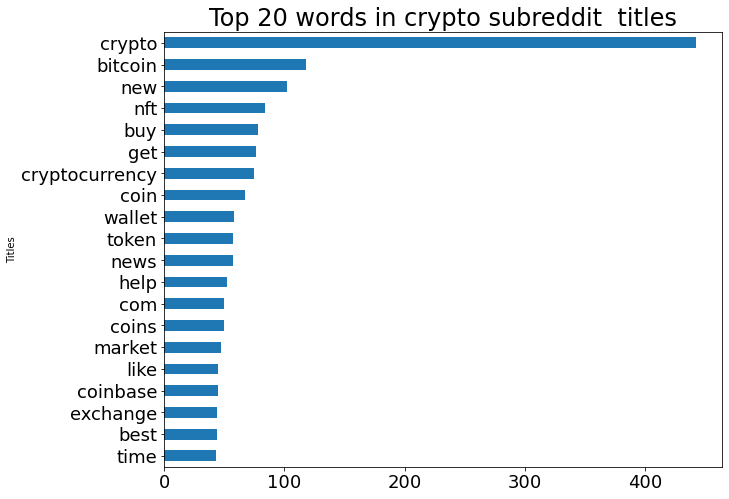

In [8]:
df_titles = pd.DataFrame(common_titles_1, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
df_titles.groupby('Titles').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in crypto subreddit  titles", fontsize=24);

In [9]:
common_titles_2 = get_top_n_words(st_df['title'], 20)
for word, freq in common_titles_2:
    print(word, freq)

stock 308
market 184
stocks 162
trading 104
buy 86
new 74
news 63
investing 59
week 57
best 54
invest 52
2020 51
amp 50
2021 49
company 49
today 48
get 47
time 46
anyone 45
us 45


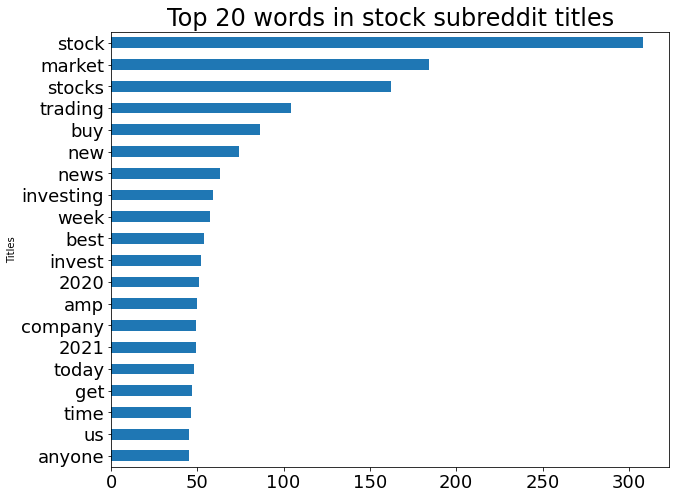

In [10]:
df_titles = pd.DataFrame(common_titles_2, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
df_titles.groupby('Titles').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in stock subreddit titles", fontsize=24);

In [11]:
df = pd.read_csv('comments.csv')
print(df.shape)
df.head()


(3999, 2)


,body,subreddit
0,Typically by hosting it on a centralized servi...,CryptoCurrency
1,"Yup, It's a feast for us.",CryptoCurrency
2,"$4000, you're kidding, right? The floor on bor...",CryptoCurrency
3,Prognosis negative. Someone dropped a fucking ...,CryptoCurrency
4,"Nano, but for monkeys.",CryptoCurrency


In [12]:
df.tail()

,body,subreddit
3994,👍,StockMarket
3995,So you can’t provide a source?,StockMarket
3996,Its not though haha.,StockMarket
3997,"Bought at 4.51 sold at 38, and back in at 15.3...",StockMarket
3998,"100% with out any doubt true ,but i guess you ...",StockMarket


In [13]:
df['body'][0]

"Typically by hosting it on a centralized service and merely hyperlinking it from the NFT's metadata.  Arweave and IPFS are two semi-decentralized solutions a lot of projects like to use."

In [14]:
len(df['body'][0])

186

In [15]:
df['length'] = df['body'].apply(len)
df.head()

,body,subreddit,length
0,Typically by hosting it on a centralized servi...,CryptoCurrency,186
1,"Yup, It's a feast for us.",CryptoCurrency,25
2,"$4000, you're kidding, right? The floor on bor...",CryptoCurrency,68
3,Prognosis negative. Someone dropped a fucking ...,CryptoCurrency,72
4,"Nano, but for monkeys.",CryptoCurrency,22


In [16]:
df['word_count'] = df['body'].apply(lambda x : len(x.split()))
df.head()

,body,subreddit,length,word_count
0,Typically by hosting it on a centralized servi...,CryptoCurrency,186,30
1,"Yup, It's a feast for us.",CryptoCurrency,25,6
2,"$4000, you're kidding, right? The floor on bor...",CryptoCurrency,68,13
3,Prognosis negative. Someone dropped a fucking ...,CryptoCurrency,72,11
4,"Nano, but for monkeys.",CryptoCurrency,22,4


In [17]:
df.describe()

,length,word_count
count,3999.000000,3999.000000
mean,110.803201,19.409102
std,190.515845,32.094972
min,1.000000,1.000000
25%,15.000000,3.000000
50%,51.000000,10.000000
75%,122.000000,22.000000
max,3267.000000,574.000000


In [18]:
# creating df for each subreddit
df['subreddit'].unique()

array(['CryptoCurrency', 'StockMarket'], dtype=object)

In [19]:
crypto = df[df['subreddit'] == 'CryptoCurrency']
crypto.head()

,body,subreddit,length,word_count
0,Typically by hosting it on a centralized servi...,CryptoCurrency,186,30
1,"Yup, It's a feast for us.",CryptoCurrency,25,6
2,"$4000, you're kidding, right? The floor on bor...",CryptoCurrency,68,13
3,Prognosis negative. Someone dropped a fucking ...,CryptoCurrency,72,11
4,"Nano, but for monkeys.",CryptoCurrency,22,4


In [20]:
crypto.describe()

,length,word_count
count,2000.000000,2000.000000
mean,107.138000,18.682500
std,157.819455,25.703541
min,1.000000,1.000000
25%,23.000000,4.000000
50%,56.000000,11.000000
75%,120.000000,22.000000
max,2123.000000,343.000000


In [21]:
stock = df[df['subreddit'] == 'StockMarket']
stock.head()

,body,subreddit,length,word_count
2000,Wish you the best.,StockMarket,18,4
2001,This was also before yields in Germany and Jap...,StockMarket,63,11
2002,"Even with the kick in the last few days, it is...",StockMarket,87,18
2003,All of us former pitchers rejoice that we may ...,StockMarket,99,20
2004,My guess is the short interest is some pseudo ...,StockMarket,312,54


In [22]:
stock.describe()

,length,word_count
count,1999.000000,1999.000000
mean,114.470235,20.136068
std,218.363366,37.405155
min,1.000000,1.000000
25%,9.000000,1.000000
50%,42.000000,8.000000
75%,123.000000,22.000000
max,3267.000000,574.000000


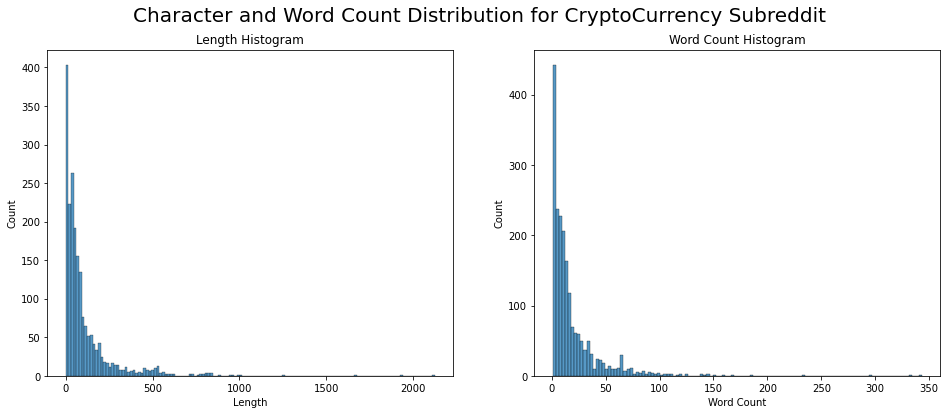

In [23]:
# subplots of the word counts for crypto subreddits
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.histplot(crypto['length'], ax=ax[0])
sns.histplot(crypto['word_count'], ax=ax[1])
ax[0].set(xlabel = 'Length', ylabel='Count', title='Length Histogram')
ax[1].set(xlabel='Word Count', ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character and Word Count Distribution for CryptoCurrency Subreddit', fontsize=20);

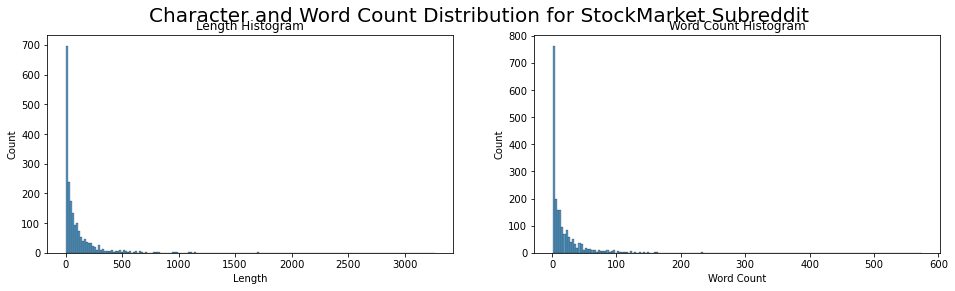

In [24]:
# subplots of the word counts for stok subreddits

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(stock['length'], ax=ax[0])
sns.histplot(stock['word_count'], ax=ax[1])
ax[0].set(xlabel = 'Length', ylabel='Count', title='Length Histogram')
ax[1].set(xlabel='Word Count', ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character and Word Count Distribution for StockMarket Subreddit', fontsize=20);

**label target value**

In [25]:
# Target is 'subreddit'. Current values: 'cryptocurrency', 'StockMarket'.
# Need to transform to 0 or 1 values. Set cryptoCurrency = 1, StockMarket = 0

df['target'] = df['subreddit'].map({'CryptoCurrency': 1, 'StockMarket': 0})


In [26]:
df.drop('subreddit', axis=1, inplace=True)
df.head()

,body,length,word_count,target
0,Typically by hosting it on a centralized servi...,186,30,1
1,"Yup, It's a feast for us.",25,6,1
2,"$4000, you're kidding, right? The floor on bor...",68,13,1
3,Prognosis negative. Someone dropped a fucking ...,72,11,1
4,"Nano, but for monkeys.",22,4,1


In [27]:
df['target'].value_counts(normalize=True)

1    0.500125
0    0.499875
Name: target, dtype: float64

**drop duplicates**

In [28]:
# there are some duplicate comments, mostly automated comments by moderators

df.duplicated().sum()

735

---

In [29]:
df[df.duplicated()].head()


,body,length,word_count,target
25,[removed],9,1,1
28,[removed],9,1,1
95,"Hello, your post was removed because your acco...",154,28,1
104,[removed],9,1,1
108,[removed],9,1,1


In [30]:
df[df.duplicated()].tail()


,body,length,word_count,target
3955,[removed],9,1,0
3961,[removed],9,1,0
3966,[removed],9,1,0
3967,[removed],9,1,0
3981,[deleted],9,1,0


In [31]:
cryptodupl = (df[df.duplicated()])
cryptodupl

,body,length,word_count,target
25,[removed],9,1,1
28,[removed],9,1,1
95,"Hello, your post was removed because your acco...",154,28,1
104,[removed],9,1,1
108,[removed],9,1,1
...,...,...,...,...
3955,[removed],9,1,0
3961,[removed],9,1,0
3966,[removed],9,1,0
3967,[removed],9,1,0


In [32]:
 list(df[df.duplicated()]['body'])[-1]


'[deleted]'

In [33]:
cryptoduplt =list (df[df.duplicated()]['body'])[0]
cryptoduplt

'[removed]'

In [34]:
len(df[df['body'] ==  cryptoduplt])

643

In [35]:
bookduplt =list (df[df.duplicated()]['body'])[-1]
bookduplt

'[deleted]'

In [36]:
len(df[df['body'] ==  bookduplt])

50

In [37]:
#df[df.duplicated() & (df['body'] != cryptoduplt) & (df['body'] != bookduplt)].head[10]

In [38]:
df.shape

(3999, 4)

In [39]:
df.drop_duplicates(inplace=True)


In [40]:
df.shape

(3264, 4)

In [41]:
df.tail()

,body,length,word_count,target
3994,👍,1,1,0
3995,So you can’t provide a source?,30,6,0
3996,Its not though haha.,20,4,0
3997,"Bought at 4.51 sold at 38, and back in at 15.3...",97,21,0
3998,"100% with out any doubt true ,but i guess you ...",144,27,0


In [42]:
df = df.reset_index(drop=True)
df.tail()

,body,length,word_count,target
3259,👍,1,1,0
3260,So you can’t provide a source?,30,6,0
3261,Its not though haha.,20,4,0
3262,"Bought at 4.51 sold at 38, and back in at 15.3...",97,21,0
3263,"100% with out any doubt true ,but i guess you ...",144,27,0


---

In [43]:
# some of these are redundant with the default functions of CountVectorizer but that's OK

def cleaner(text):
    # Make lowercase
    text = text.lower()

    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [44]:
df['body'] = df['body'].apply(cleaner)

In [45]:
df.shape

(3264, 4)

In [46]:
# drop rows where body = ''
df = df[df['body'] != '']
df = df.reset_index(drop=True)

In [47]:
df.shape

(3240, 4)

**NLP pre-processing and exploration**

**lemmatize**

In [48]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words    

In [49]:
df['body'] = df['body'].apply(lemmatize_words)


In [50]:
print("Size: ", df.shape)
df

Size:  (3240, 4)


,body,length,word_count,target
0,typically hosting centralized service and mere...,186,30,1
1,yup feast for,25,6,1
2,4000 you kidding right the floor bored ape lik...,68,13,1
3,prognosis negative someone dropped fucking jun...,72,11,1
4,nano but for monkey,22,4,1
...,...,...,...,...
3235,source quick google say canceled the not finis...,166,27,0
3236,you can’ provide source,30,6,0
3237,it not though haha,20,4,0
3238,bought sold and back rinse and repeat this sto...,97,21,0


In [51]:
# drop rows where body = ''
df = df[df['body'] != '']
df = df.reset_index(drop=True)

In [52]:
df.shape

(3232, 4)

In [53]:
df.to_csv('comments_clean.csv', index=False)


---

## We can Vectorize our DataFrame:


In [54]:
cv = CountVectorizer()
crypto_vect = cv.fit_transform(crypto['body'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())
crypto_vect_df.head()

,000,017,02,05,07,09,10,100,1000,10000x,...,yup,zealot,zero,zk,zkevm,zkrollup,zkrollups,zoey,zoom,zoomed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:

stock_vect = cv.fit_transform(stock['body'])
stock_vect_df = pd.DataFrame(stock_vect.todense(), columns=cv.get_feature_names())
stock_vect_df.head()

,00,000,000040,000rmb,000x,03,04,05,06b,07,...,zombie,zoom,zoomed,zuma,мне,момо,не,понятно,совсем,что
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot the Most Frequently Occurring Words by subreddit

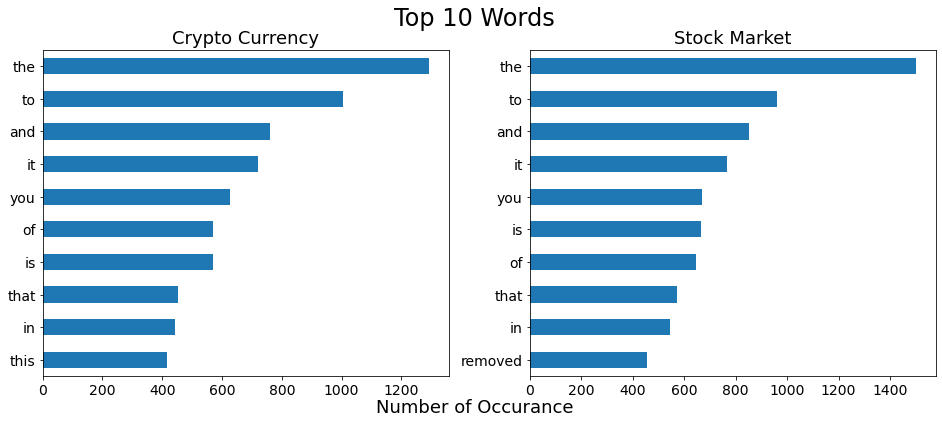

In [56]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
stock_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Crypto Currency', fontsize=18)
ax[1].set_title('Stock Market', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, .04, 'Number of Occurance', ha='center', fontsize=18);

### Vectorize and plot again but using 'english' stopwords

In [57]:
cv = CountVectorizer(stop_words='english')
crypto_vect = cv.fit_transform(crypto['body'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())

stock_vect = cv.fit_transform(stock['body'])
stock_vect_df = pd.DataFrame(stock_vect.todense(), columns=cv.get_feature_names())

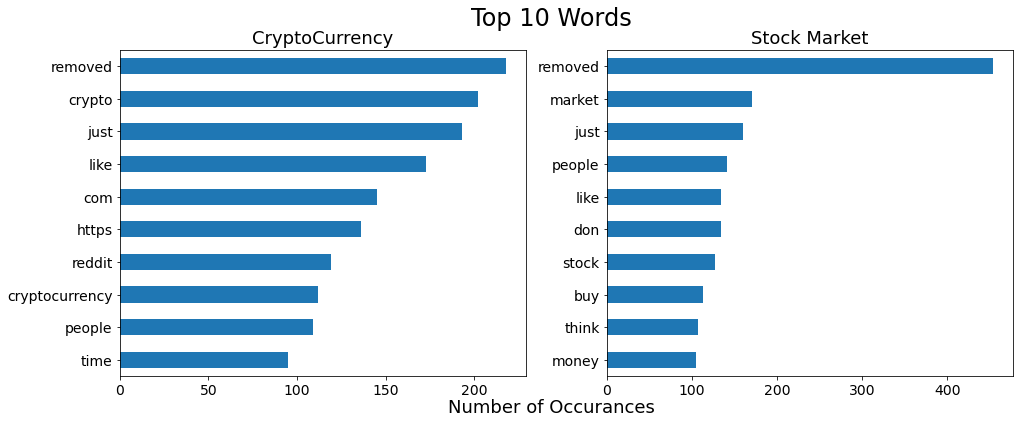

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
stock_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoCurrency', fontsize=18)
ax[1].set_title('Stock Market', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

### Vectorize and plot again but using 'english' stopwords and bigrams

In [59]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
crypto_vect = cv.fit_transform(crypto['body'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())

stock_vect = cv.fit_transform(stock['body'])
stock_vect_df = pd.DataFrame(stock_vect.todense(), columns=cv.get_feature_names())

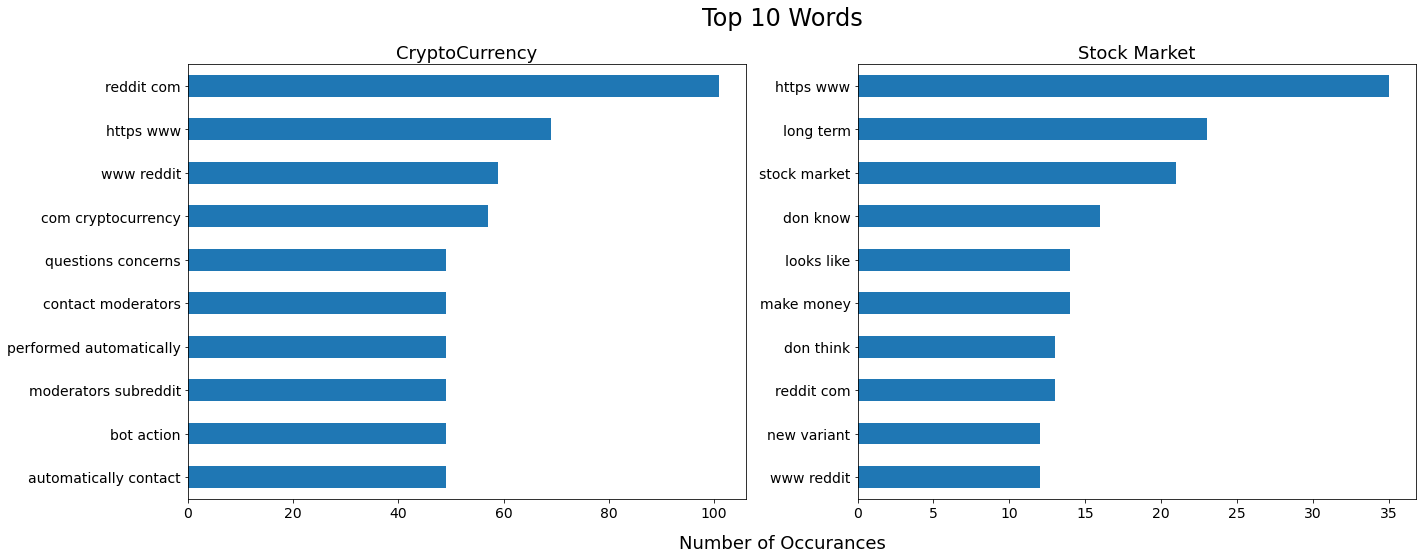

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
stock_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoCurrency', fontsize=18)
ax[1].set_title('Stock Market', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

***CountVectorizer***

***most frequent crypto words:***

In [61]:
# Easy way to get most frequently used words: change max_features

count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 35) 

# input for CountVectorizer is an array of strings
vector_input_crpto = df[df['target'] == 1]['body']

# fit_transform the vectorizer
crypto_words = count_vect.fit_transform(vector_input_crpto)

# convert output to a Numpy array
crypto_words = crypto_words.toarray()

In [62]:
# get the words
crypto_words_list = count_vect.get_feature_names()
print(crypto_words_list)

['bitcoin', 'btc', 'buy', 'coin', 'crypto', 'day', 'dip', 'don', 'eth', 'going', 'good', 'got', 'ha', 'just', 'know', 'like', 'make', 'market', 'money', 'moon', 'new', 'people', 'post', 'price', 'question', 'right', 'sell', 'thing', 'think', 'time', 'use', 'wa', 'want', 'way', 'year']


**most frequent Stock words:**

In [63]:
# Easy way to get most frequently used words: change max_features

count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 36) 

# input for CountVectorizer is an array of strings
vector_input_stock = df[df['target'] == 0]['body']

# fit_transform the vectorizer
stock_words = count_vect.fit_transform(vector_input_stock)

# convert output to a Numpy array
stock_words = stock_words.toarray()

In [64]:
# get the words
stock_words_list = count_vect.get_feature_names()
print(stock_words_list)

['buy', 'company', 'covid', 'day', 'don', 'going', 'good', 'ha', 'just', 'know', 'like', 'lol', 'long', 'look', 'lot', 'make', 'market', 'mean', 'money', 'month', 'need', 'new', 'people', 'price', 'say', 'sell', 'share', 'stock', 'thing', 'think', 'time', 'vaccine', 'wa', 'way', 'week', 'year']


**edit stop words**

In [65]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did','just', 'like', 'lol', 'ha' 'www', 'https', 'reddit', 'com', 'wa', 'removed', 'don', 'doesn', 'getting', 'going', 'got', 'deleted', 'isn', 'removed']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [66]:
# df_titles = pd.DataFrame(common_titles_2, columns=['Titles', 'count'])
# plt.figure(figsize=(10,8))
# df_titles.groupby('Titles').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
# plt.title("Top 20 words in stock subreddit titles", fontsize=24);

### Crypto Vs Stocks top 100 words

```
# ***to do***
# out of 100, how many are same & how many different?
# make word clouds?

```

### word/n-gram frequency:

In [67]:
# Instantiate the "CountVectorizer" object, which is scikit-learn's bag of words tool.
# CountVectorizer transforms the body text from the reddit comments into features (i.e. words)
# and creates columns (vectors) with word counts for each comment

count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = stop_words, 
                             max_features = 10000, 
                             ngram_range=(1, 3)
                            ) 

# input for CountVectorizer is an array of strings
vector_input_crypto = df[df['target'] == 1]['body']

# fit_transform the vectorizer
crypto_words = count_vect.fit_transform(vector_input_crypto)

# convert output to a Numpy array
crypto_words = crypto_words.toarray()

In [68]:
# ***to do*** (optional)
# if the array is very large, it's faster to do a sum of the array first (which creates a vector of the sums)
# and then combine that with the feature names in a dataframe

crypto_matrix = pd.DataFrame(crypto_words, columns=count_vect.get_feature_names())

crypto_matrix.sum().sort_values(ascending=False).head(50)

crypto            198
coin              112
people            109
time              101
market             93
ha                 86
think              84
good               83
buy                83
year               80
money              75
make               75
know               74
post               73
eth                71
btc                68
thing              64
day                63
want               61
moon               60
use                60
right              56
price              56
question           54
way                54
new                53
bitcoin            52
sell               52
dip                51
need               50
cryptocurrency     48
comment            48
say                47
wallet             47
really             46
month              45
high               45
bot                45
lot                44
look               42
exchange           42
better             41
action             40
subreddit          40
work               40
performed 

In [69]:
crypto_matrix.mean().sort_values(ascending=False).head(50)


crypto            0.113208
coin              0.064037
people            0.062321
time              0.057747
market            0.053173
ha                0.049171
think             0.048027
good              0.047456
buy               0.047456
year              0.045740
money             0.042882
make              0.042882
know              0.042310
post              0.041738
eth               0.040595
btc               0.038879
thing             0.036592
day               0.036021
want              0.034877
moon              0.034305
use               0.034305
right             0.032018
price             0.032018
question          0.030875
way               0.030875
new               0.030303
bitcoin           0.029731
sell              0.029731
dip               0.029160
need              0.028588
cryptocurrency    0.027444
comment           0.027444
say               0.026872
wallet            0.026872
really            0.026301
month             0.025729
high              0.025729
b

In [70]:
count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = stop_words, 
                             max_features = 10000, 
                             ngram_range=(1, 3)
                            ) 

# input for CountVectorizer is an array of strings
vector_input_stock = df[df['target'] == 0]['body']

# fit_transform the vectorizer
stock_words = count_vect.fit_transform(vector_input_stock)

# convert output to a Numpy array
stock_words = stock_words.toarray()

In [71]:
stock_matrix = pd.DataFrame(stock_words, columns=count_vect.get_feature_names())

stock_matrix.sum().sort_values(ascending=False).head(50)

stock       197
market      183
people      142
ha          134
year        123
buy         114
think       108
money       105
know        103
time         98
good         93
day          92
company      87
make         79
long         73
new          72
price        71
look         70
covid        66
way          63
vaccine      62
say          60
mean         59
thing        56
sell         55
share        55
week         53
need         52
lot          52
month        51
investor     51
buying       49
want         48
really       46
fund         44
bought       43
trade        43
trading      42
rate         42
sure         40
term         40
short        39
high         39
use          39
yes          39
growth       38
point        38
better       38
right        37
let          37
dtype: int64

In [72]:
stock_matrix.mean().sort_values(ascending=False).head(50)

stock       0.132839
market      0.123399
people      0.095752
ha          0.090357
year        0.082940
buy         0.076871
think       0.072825
money       0.070802
know        0.069454
time        0.066082
good        0.062711
day         0.062036
company     0.058665
make        0.053270
long        0.049225
new         0.048550
price       0.047876
look        0.047202
covid       0.044504
way         0.042481
vaccine     0.041807
say         0.040459
mean        0.039784
thing       0.037761
sell        0.037087
share       0.037087
week        0.035738
need        0.035064
lot         0.035064
month       0.034390
investor    0.034390
buying      0.033041
want        0.032367
really      0.031018
fund        0.029670
bought      0.028995
trade       0.028995
trading     0.028321
rate        0.028321
sure        0.026972
term        0.026972
short       0.026298
high        0.026298
use         0.026298
yes         0.026298
growth      0.025624
point       0.025624
better      0

### TF-IDF Vectorizer

In [73]:
tvec = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

crypto_tf_words = tvec.fit_transform(vector_input_crypto)

crypto_tf_words = crypto_tf_words.toarray()

crypto_matrix = pd.DataFrame(crypto_tf_words, columns=tvec.get_feature_names())

crypto_matrix.sum().sort_values(ascending=False).head(50)

crypto      27.107063
coin        18.540645
buy         17.134953
eth         16.348571
time        16.002444
good        15.154140
right       15.018123
btc         14.951900
dip         13.687948
market      13.476023
people      13.294037
ha          13.104266
know        13.015285
moon        12.472663
money       12.217512
cro         11.670829
sell        11.291647
think       11.242059
day         10.884682
make        10.843007
yes         10.197864
year        10.179792
let          9.804063
want         9.688802
bought       9.680962
use          9.659157
way          9.345464
thing        8.907351
ada          8.861391
post         8.763132
bitcoin      8.612845
need         8.609887
better       8.491061
really       8.433100
shit         8.233512
say          8.138191
look         8.007586
wallet       7.990431
work         7.948069
price        7.849456
exchange     7.741532
hope         7.561781
month        7.541611
great        7.535395
future       7.109975
buying    

In [74]:
tvec = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

stock_tf_words = tvec.fit_transform(vector_input_stock)

stock_tf_words = stock_tf_words.toarray()

stock_matrix = pd.DataFrame(stock_tf_words, columns=tvec.get_feature_names())

stock_matrix.sum().sort_values(ascending=False).head(50)

stock      22.315671
market     20.283545
buy        17.860307
good       16.584283
ha         15.361614
year       15.154328
day        15.153883
think      14.661926
people     14.390411
time       14.218555
know       13.666862
look       13.029544
money      11.526636
way        10.443996
make        9.985214
thanks      9.541676
share       9.508685
vaccine     9.374509
company     9.252416
long        8.978570
say         8.975621
new         8.851180
buying      8.820932
bought      8.614283
stop        8.472861
thing       8.379671
yes         8.327621
covid       8.025022
mean        7.942204
sell        7.921775
sure        7.823807
week        7.700149
let         7.639608
didn        7.634363
price       7.539063
want        7.277948
better      6.932939
month       6.852651
use         6.851414
need        6.838621
trading     6.791388
lot         6.773163
short       6.722066
hold        6.700107
yeah        6.540756
cash        6.456074
today       6.405664
tesla       6

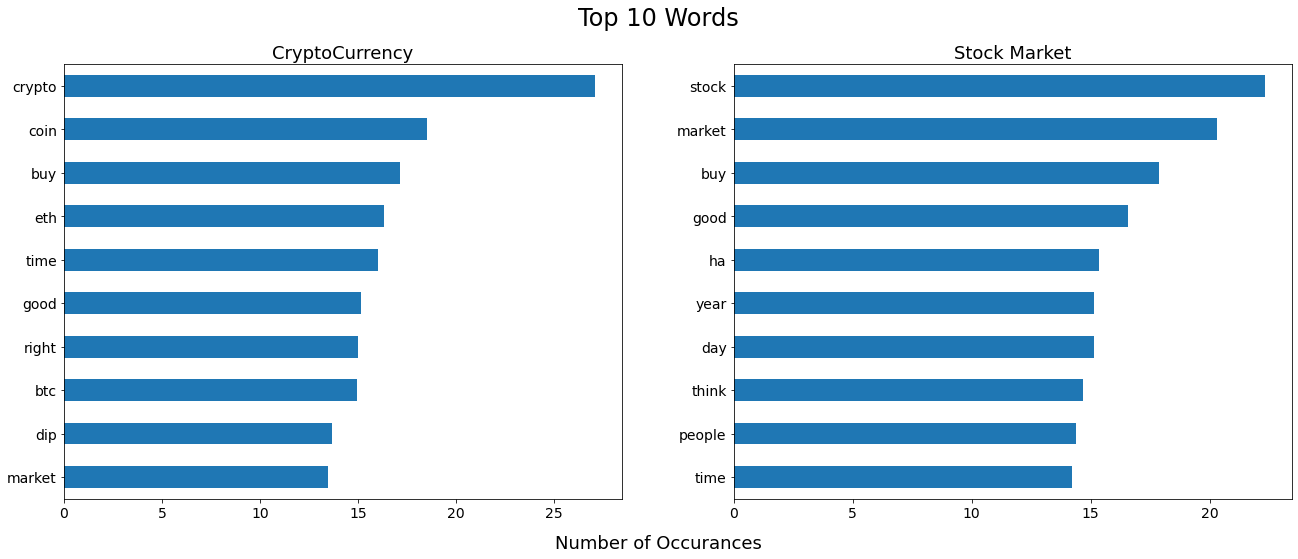

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))
crypto_matrix.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
stock_matrix.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoCurrency', fontsize=18)
ax[1].set_title('Stock Market', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);